In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,5
DATASET_PATH_may = 'C://Users//Naruto//Desktop//Python//CallVoiceQuality_Data_2018_May.csv'
DATASET_PATH_April = 'C://Users//Naruto//Desktop//Python//CallVoiceQualityExperience-2018-April.csv'

### <center> Описание датасета.
Эти данные собирают отзывы клиентов с помощью приложения MyCAll TRAI (регулирующий орган Индии в сфере телекоммуникаций) в мае и апреле 2018. Клиенты оценивают свое мнение о качестве голосовых вызовов в режиме реального времени и помогают TRAI собирать данные об опыте работы с клиентами вместе с данными сети.


Данные собираются для различных поставщиков услуг, из разных мест, поколений сетей 3G, 4G, 2G, рейтингов, координат и т. д.
Прилагаемые данные относятся к двум разным месяцам к маю и апрелю.
   
##### Расшифровка столбцов:
    	Operator - оператор
        In Out Travelling - локация	
        Network Type - поколение сети
        Rating - рейтинг
        Call Drop Category - оценка качества вызова
        Latitude - широта	
        Longitude - долгота
        State Name - регион (штат)
    
  Если Latitude и Longitude равны -1 или 0 и State Name пустое значение это означает, что пользователь заблокировалдоступ к данным о местоположении.
    

In [5]:
df_may = pd.read_csv(DATASET_PATH_may)

In [6]:
df_may

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,RJio,Travelling,4G,5,Satisfactory,-1.000000,-1.000000,NaN
1,RJio,Travelling,4G,2,Poor Voice Quality,28.593588,77.164276,NCT
2,BSNL,Indoor,3G,5,Satisfactory,-1.000000,-1.000000,NaN
3,BSNL,Indoor,3G,5,Satisfactory,-1.000000,-1.000000,NaN
4,BSNL,Indoor,3G,5,Satisfactory,-1.000000,-1.000000,NaN
...,...,...,...,...,...,...,...,...
31976,RJio,Indoor,4G,4,Satisfactory,20.979739,75.580521,Maharashtra
31977,Airtel,Indoor,4G,5,Satisfactory,17.438340,78.382000,Telangana
31978,RJio,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN
31979,RJio,Indoor,4G,5,Satisfactory,28.533182,77.216453,NCT


In [7]:
df_April = pd.read_csv(DATASET_PATH_April)
df_April

,Operator,Indoor_Outdoor_Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,Airtel,Indoor,3G,5,Satisfactory,28.422966,76.912324,Haryana
1,RJio,Indoor,4G,4,Satisfactory,11.158358,77.301897,Tamil Nadu
2,Airtel,Outdoor,3G,5,Satisfactory,28.422931,76.912253,Haryana
3,Airtel,Travelling,3G,5,Satisfactory,28.422947,76.912260,Haryana
4,RJio,Indoor,4G,5,Satisfactory,25.625990,85.094294,Bihar
...,...,...,...,...,...,...,...,...
63331,RJio,Indoor,4G,5,Satisfactory,26.855378,89.375578,West Bengal
63332,Airtel,Indoor,Unknown,3,Poor Network,19.408291,72.838735,Maharashtra
63333,Airtel,Travelling,Unknown,4,Satisfactory,19.408291,72.838735,Maharashtra
63334,Vodafone,Indoor,4G,4,Satisfactory,30.323117,78.001541,Uttarakhand


Для однотипности df_may и df_April. Заменим Poor Voice Quality на Poor Network в столбце Call Drop Category в df_may.

In [8]:
df_may['Call Drop Category'] = df_may['Call Drop Category'].replace('Poor Voice Quality', 'Poor Network')

Провери тип данных и количество пропусков по каждому столбцу

In [9]:
df_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31981 entries, 0 to 31980
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Operator            31981 non-null  object 
 1   In Out Travelling   31981 non-null  object 
 2   Network Type        31981 non-null  object 
 3   Rating              31981 non-null  int64  
 4   Call Drop Category  31981 non-null  object 
 5   Latitude            31981 non-null  float64
 6   Longitude           31981 non-null  float64
 7   State Name          23299 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.0+ MB


In [10]:
df_April.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63336 entries, 0 to 63335
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Operator                   63336 non-null  object 
 1   Indoor_Outdoor_Travelling  63336 non-null  object 
 2   Network Type               63336 non-null  object 
 3   Rating                     63336 non-null  int64  
 4   Call Drop Category         63336 non-null  object 
 5   Latitude                   63336 non-null  float64
 6   Longitude                  63336 non-null  float64
 7   State Name                 47370 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.9+ MB


In [11]:
df_may.isna().sum()
#большое количество пропусков в столбце State Name

Operator                 0
In Out Travelling        0
Network Type             0
Rating                   0
Call Drop Category       0
Latitude                 0
Longitude                0
State Name            8682
dtype: int64

In [12]:
df_April.isna().sum()
#большое количество пропусков в столбце State Name

Operator                         0
Indoor_Outdoor_Travelling        0
Network Type                     0
Rating                           0
Call Drop Category               0
Latitude                         0
Longitude                        0
State Name                   15966
dtype: int64

Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение) можно только для столбцы Rating по обоим DF

In [13]:
df_may["Rating"].describe()


count    31981.000000
mean         3.496201
std          1.454767
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [14]:
df_may["Rating"].median()


4.0

In [15]:
df_April["Rating"].describe()

count    63336.000000
mean         3.449997
std          1.450042
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [16]:
df_April["Rating"].median()

4.0

### Подсчитаем изменения рейтинга за месяц. Определим компании у которых наблюдалось изменение рейтинга.


In [17]:
#Подсчитаем средний рейтинг по операторам для каждого месяца и отсортируем по убыванию в апреле
Rating_by_Operator_may= df_may[['Rating', 'Operator']].groupby('Operator').mean().round(2).sort_values(by='Rating', ascending=False)
Rating_by_Operator_April= df_April[['Rating', 'Operator']].groupby('Operator').mean().round(2).sort_values(by='Rating', ascending=False)
#объединим Rating_by_Operator_April и Rating_by_Operator_may
Rating_by_Operator = Rating_by_Operator_April.join(Rating_by_Operator_may, rsuffix='Operator')
Rating_by_Operator.rename(columns={'Rating': 'April', 'RatingOperator': 'May'}, inplace=True)


In [18]:
Rating_by_Operator['Delta'] = ((Rating_by_Operator.May - Rating_by_Operator.April))
Rating_by_Operator.sort_values(by='Delta', ascending=False)

,April,May,Delta
Operator,,,
MTNL,3.27,5.00,1.73
Tata,3.40,3.83,0.43
Vodafone,3.38,3.61,0.23
Telenor,2.50,2.67,0.17
Idea,3.52,3.64,0.12
Airtel,3.25,3.34,0.09
RJio,3.57,3.55,-0.02
BSNL,3.54,3.37,-0.17
RComm,1.29,1.00,-0.29


<AxesSubplot:title={'center':'Распределение изменения отзывов по операторам'}, xlabel='Оператор', ylabel='Изменение'>

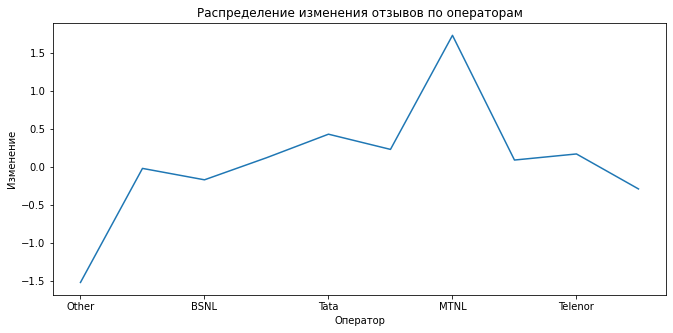

In [19]:
# Гистограмма по Delta
Rating_by_Operator["Delta"].plot(title='Распределение изменения отзывов по операторам', 
                             xlabel='Оператор', 
                             ylabel='Изменение')
#оператор MTNL значительно улучшила, а RComm ухудшила качетство предоставляемого сервиса.

<AxesSubplot:title={'center':'Распределение оценок пользователей в апреле'}, ylabel='Frequency'>

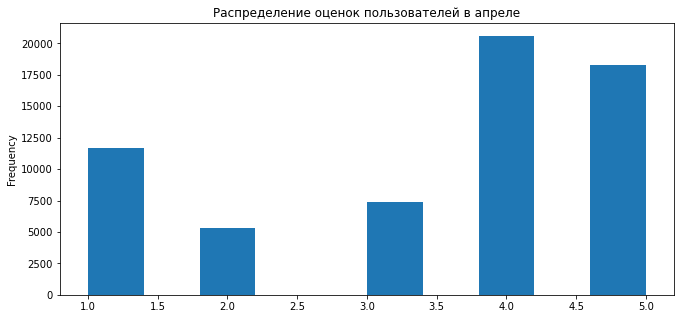

In [20]:
# распределение оценок пользователей

df_April['Rating'].plot(kind='hist', 
                   title='Распределение оценок пользователей в апреле', bins=10)

<AxesSubplot:title={'center':'Распределение оценок пользователей в мае'}, ylabel='Frequency'>

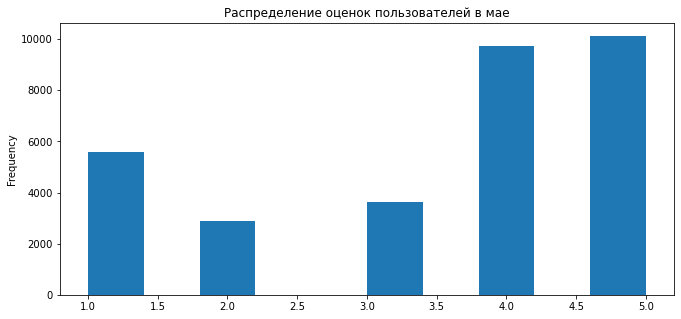

In [21]:
df_may['Rating'].plot(kind='hist', 
                   title='Распределение оценок пользователей в мае', bins=10)

<AxesSubplot:title={'center':'Распределение оценок пользователей'}, ylabel='Frequency'>

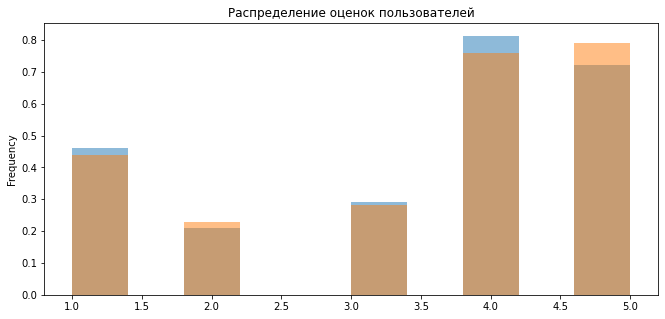

In [22]:
# сравнение
df_April['Rating'].plot(kind='hist', 
                     title='Распределение оценок пользователей',
                     alpha = 0.5,
                     bins=10,
                     density = True)


df_may['Rating'].plot(kind='hist', 
                     title='Распределение оценок пользователей',
                     alpha = 0.5,
                     bins=10,
                     density = True)

Вывод: в мае фиксируется прирост оценок со значением 5. Также в мае значительно меньшее количество оценок по сравнению с апрелем.

Text(0.5, 1.0, 'Распределение оценок')

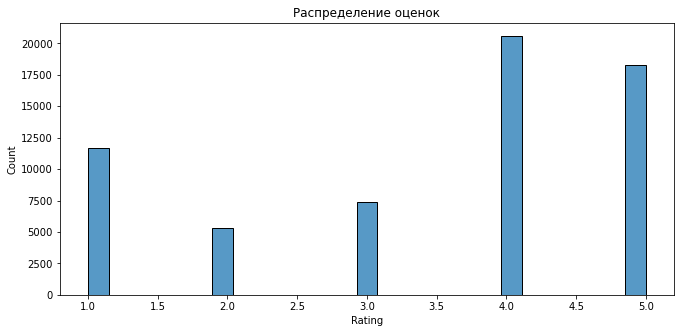

In [23]:
sns.histplot(df_April['Rating'])
plt.title('Распределение оценок')

<AxesSubplot:title={'center':'Распределение оценок пользователей за май'}>

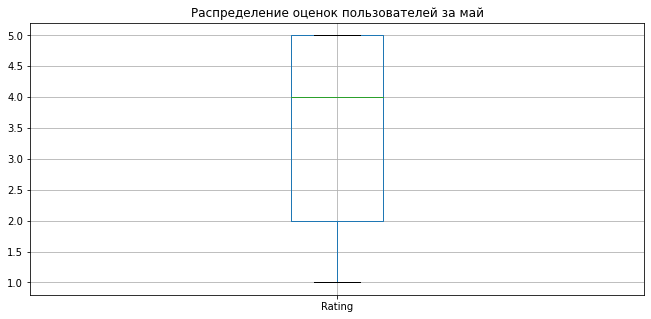

In [24]:
df_may['Rating'].plot(kind='box',
                   title='Распределение оценок пользователей за май', grid=True)

<AxesSubplot:title={'center':'Распределение оценок пользователей за апрель'}>

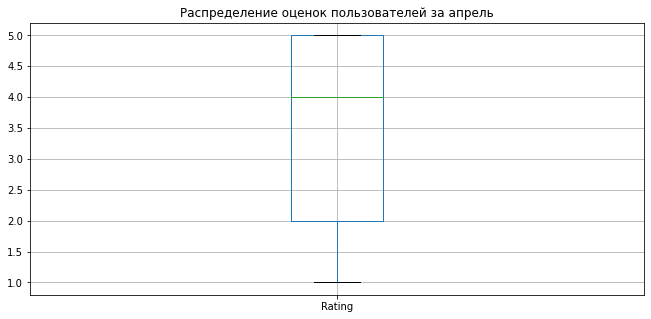

In [25]:
df_April['Rating'].plot(kind='box',
                   title='Распределение оценок пользователей за апрель', grid=True)

### Анализ распределения оценок по операторам

In [26]:
by_Operator_April= df_April[['Rating', 'Operator']].groupby('Operator').count().sort_values(by='Rating', ascending=False)
by_Operator_may= df_may[['Rating', 'Operator']].groupby('Operator').count().sort_values(by='Rating', ascending=False)
df_Operator = by_Operator_April.join(by_Operator_may, rsuffix='Operator')
df_Operator.rename(columns={'Rating': 'April', 'RatingOperator': 'May'}, inplace=True)
df_Operator

,April,May
Operator,,
RJio,25556,13664
Airtel,14899,7641
Vodafone,8469,4041
BSNL,8084,3528
Idea,5734,2825
RComm,217,2
Tata,197,224
MTNL,142,2
Other,36,9


<AxesSubplot:title={'center':'Распределение отзывов по операторам'}, xlabel='Оператор', ylabel='Отзывы, шт.'>

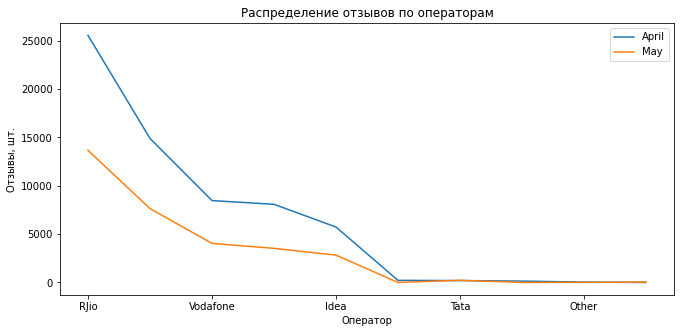

In [27]:
df_Operator.plot(title='Распределение отзывов по операторам', 
                             xlabel='Оператор', 
                             ylabel='Отзывы, шт.')


AttributeError: 'AxesSubplot' object has no attribute 'loc'

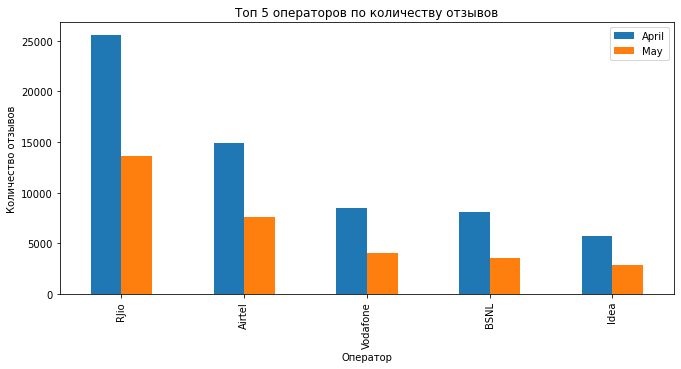

In [28]:
df_Operator.loc[['RJio', 'Airtel', 'Vodafone', 'BSNL', 'Idea']].plot(kind='bar', 
                                                                  title='Топ 5 операторов по количеству отзывов',
                                                                  xlabel='Оператор',
                                                                  ylabel='Количество отзывов').loc[['RJio', 'Airtel', 'Vodafone', 'BSNL', 'Idea']].plot(kind='bar' 
                                                                  )


In [30]:
df_Operator['ALL_otzyv'] = ((df_Operator.April + df_Operator.May))


<AxesSubplot:title={'center':'Распределение оценок по операторам'}, xlabel='Оператор', ylabel='Количество оценок'>

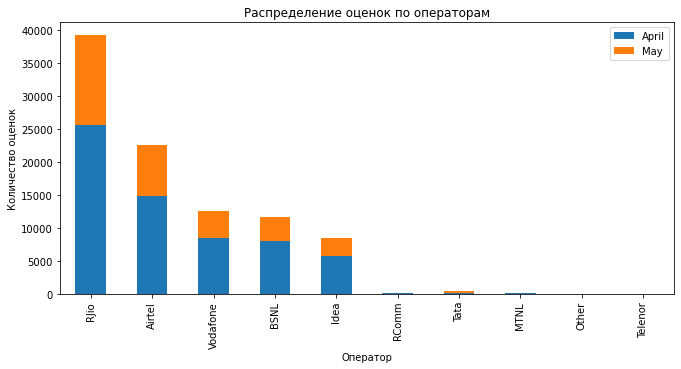

In [31]:
df_Operator.drop('ALL_otzyv', axis=1).plot(kind='bar', 
                             title='Распределение оценок по операторам',
                             xlabel='Оператор',
                             ylabel='Количество оценок', stacked=True)                                         

Вывод: Выделяются Топ 5 операторов по количеству оценок пользователей. По всем операторам есть снижение количества оценок.

### Подсчитаем средний рейтинг для различных локаций

In [32]:
df_may.rename(columns={'In Out Travelling': 'Indoor_Outdoor_Travelling'}, inplace=True)


In [33]:
Travelling_may= df_may[['Rating', 'Indoor_Outdoor_Travelling']].groupby('Indoor_Outdoor_Travelling').mean().round(2)
Travelling_April= df_April[['Rating', 'Indoor_Outdoor_Travelling']].groupby('Indoor_Outdoor_Travelling').mean().round(2)
df_Rating = Travelling_April.join(Travelling_may, rsuffix='Indoor_Outdoor_Travelling')
df_Rating.rename(columns={'Rating': 'April', 'RatingIndoor_Outdoor_Travelling': 'May'}, inplace=True)
df_Rating

,April,May
Indoor_Outdoor_Travelling,,
Indoor,3.44,3.46
Outdoor,3.42,3.61
Travelling,3.61,3.47


AttributeError: 'AxesSubplot' object has no attribute 'loc'

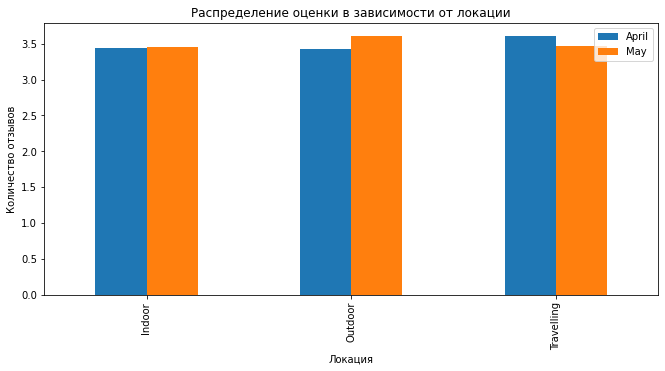

In [34]:
df_Rating.loc[['Indoor', 'Outdoor', 'Travelling']].plot(kind='bar', 
                                                                  title='Распределение оценки в зависимости от локации',
                                                                  xlabel='Локация',
                                                                  ylabel='Количество отзывов').loc[['Indoor', 'Outdoor', 'Travelling']].plot(kind='bar') 
                                                

In [35]:
# Количество оценок по локациям
Travelling_may_count= df_may[['Rating', 'Indoor_Outdoor_Travelling']].groupby('Indoor_Outdoor_Travelling').count()
Travelling_April_count= df_April[['Rating', 'Indoor_Outdoor_Travelling']].groupby('Indoor_Outdoor_Travelling').count()
Travelling_count = Travelling_April_count.join(Travelling_may_count, rsuffix='Indoor_Outdoor_Travelling')
Travelling_count.rename(columns={'Rating': 'April', 'RatingIndoor_Outdoor_Travelling': 'May'}, inplace=True)
Travelling_count['April_%'] = ((Travelling_count.April/63336)*100).round(1)       
Travelling_count['May_%'] = ((Travelling_count.May/31981)*100).round(1)    
Travelling_count

,April,May,April_%,May_%
Indoor_Outdoor_Travelling,,,,
Indoor,42411,21277,67.0,66.5
Outdoor,15032,7391,23.7,23.1
Travelling,5893,3313,9.3,10.4


<AxesSubplot:title={'center':'Количество оценок по локациям за апрель'}, ylabel='April'>

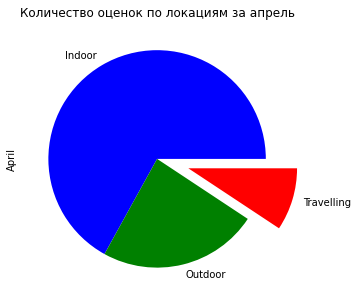

In [36]:
colors = ['blue','green','red']
explode = [0,0,0.3]
Travelling_count['April'].plot(kind='pie', colors=colors, explode=explode, title='Количество оценок по локациям за апрель')



<AxesSubplot:title={'center':'Количество оценок по локациям за май'}, ylabel='May'>

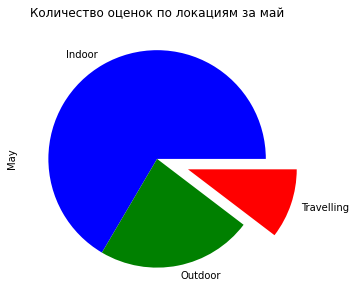

In [37]:
colors = ['blue','green','red']
explode = [0,0,0.3]
values = [66,23,10] #не нашел способа нанести проценты на диаграмму
Travelling_count['May'].plot(kind='pie', colors=colors, explode=explode, title='Количество оценок по локациям за май')


Вывод: Более 60% оценок производится в Indoor. В мае увеличилась доля измерений в локации Travelling на 1.1% и уменьшилась доля Indoor на 0,5% 

### Анализ оценок по категориям

In [38]:
#средняя оценка по категориям
df_may_Call_may= df_may[['Rating', 'Call Drop Category']].groupby('Call Drop Category').mean().round(2)
df_may_Call_April= df_April[['Rating', 'Call Drop Category']].groupby('Call Drop Category').mean().round(2)
Call_Rating = df_may_Call_April.join(df_may_Call_may, rsuffix='Call Drop Category')
Call_Rating.rename(columns={'Rating': 'April', 'RatingCall Drop Category': 'May'}, inplace=True)
Call_Rating

,April,May
Call Drop Category,,
Call Dropped,1.29,1.26
Poor Network,1.68,1.68
Satisfactory,4.11,4.36


In [39]:
#суммарное количество оценок по категориям
df_may_Call_count_may= df_may[['Rating', 'Call Drop Category']].groupby('Call Drop Category').count()
df_may_Call_count_April= df_April[['Rating', 'Call Drop Category']].groupby('Call Drop Category').count()
Call_count = df_may_Call_count_April.join(df_may_Call_count_may, rsuffix='Call Drop Category')
Call_count.rename(columns={'Rating': 'April', 'RatingCall Drop Category': 'May'}, inplace=True)
Call_count


,April,May
Call Drop Category,,
Call Dropped,5104,2319
Poor Network,11257,7660
Satisfactory,46975,22002


AttributeError: 'AxesSubplot' object has no attribute 'loc'

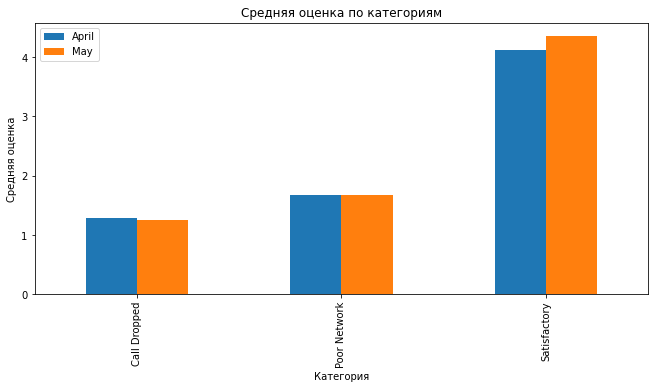

In [40]:
Call_Rating.loc[['Call Dropped', 'Poor Network', 'Satisfactory']].plot(kind='bar', 
                                                                  title='Средняя оценка по категориям',
                                                                  xlabel='Категория',
                                                                  ylabel='Средняя оценка').loc[['Call Dropped', 'Poor Network', 'Satisfactory']].plot(kind='bar' 
                                                                  )


Вывод: В категорях Call Dropped и Poor Network оценки пользователей ожидаемо низкие 1,29 и 1,68 соответственно. Никому не нравится плохая связь). В мае произошел рост средней оценки в категории Satisfactory на 0,25

### Анализ оценок по регионам

In [41]:
# выведем информацию о количеством оценок

df_may_Call_count_may_State_Name = df_may[['Rating', 'State Name']].groupby('State Name').count().sort_values(by='Rating', ascending=False)
df_may_Call_count_April_State_Name = df_April[['Rating', 'State Name']].groupby('State Name').count().sort_values(by='Rating', ascending=False)
State_Name_count = df_may_Call_count_April_State_Name.join(df_may_Call_count_may_State_Name, rsuffix='State Name')
State_Name_count.rename(columns={'Rating': 'April', 'RatingState Name': 'May'}, inplace=True)
State_Name_count

,April,May
State Name,,
Maharashtra,9329,4610.0
West Bengal,4340,2033.0
Uttar Pradesh,4128,2037.0
Tamil Nadu,3754,1367.0
Karnataka,3629,1742.0
Gujarat,3015,1268.0
Telangana,2794,1938.0
NCT,2682,1209.0
Odisha,2008,672.0


In [42]:
# выведем информацию о средней оценки для каждого региона

df_may_Call_Rating_may_State_Name = df_may[['Rating', 'State Name']].groupby('State Name').mean().round(2)
df_may_Call_Rating_April_State_Name = df_April[['Rating', 'State Name']].groupby('State Name').mean().round(2)
State_Name_Rating = df_may_Call_Rating_April_State_Name.join(df_may_Call_Rating_may_State_Name, rsuffix='State Name')
State_Name_Rating.rename(columns={'Rating': 'April', 'RatingState Name': 'May'}, inplace=True)
State_Name_Rating

,April,May
State Name,,
Adis Abeba,3.30,NaN
Andhra Pradesh,3.28,3.75
Arunachal Pradesh,3.20,1.50
Assam,4.36,4.63
Bihar,3.60,2.60
Central Region,2.88,NaN
Chandigarh,4.74,4.63
Chhattisgarh,3.70,3.71
Chhukha,2.47,3.33


In [43]:
State_Name_Rating.style.bar(align='mid')

,April,May
State Name,,
Adis Abeba,3.300000,nan
Andhra Pradesh,3.280000,3.750000
Arunachal Pradesh,3.200000,1.500000
Assam,4.360000,4.630000
Bihar,3.600000,2.600000
Central Region,2.880000,nan
Chandigarh,4.740000,4.630000
Chhattisgarh,3.700000,3.710000
Chhukha,2.470000,3.330000


Объединим информацию о количестве и средней оценки по региону

In [44]:
#Объединим информацию о количестве и средней оценки по региону
State_Name = State_Name_count.join(State_Name_Rating, rsuffix='State Name')
State_Name.rename(columns={'AprilState Name': 'April_Rating', 'MayState Name': 'May_Rating'}, inplace=True)
State_Name

,April,May,April_Rating,May_Rating
State Name,,,,
Maharashtra,9329,4610.0,3.37,3.46
West Bengal,4340,2033.0,3.59,3.68
Uttar Pradesh,4128,2037.0,3.68,3.73
Tamil Nadu,3754,1367.0,3.62,3.86
Karnataka,3629,1742.0,3.53,3.82
Gujarat,3015,1268.0,3.45,3.29
Telangana,2794,1938.0,3.64,3.52
NCT,2682,1209.0,3.12,3.19
Odisha,2008,672.0,3.94,3.66


<AxesSubplot:xlabel='May', ylabel='May_Rating'>

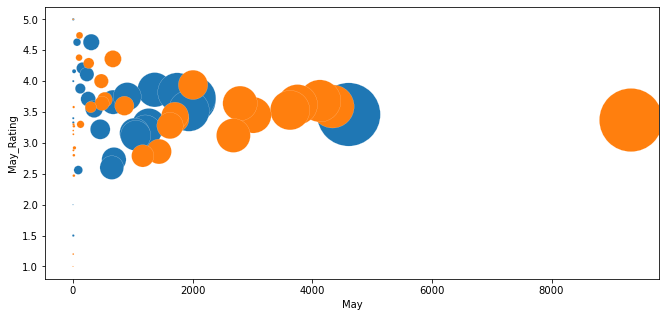

In [63]:
data = State_Name
sns.scatterplot(data=data, x="May", y="May_Rating", size="May", legend=False, sizes=(1, 4000))
sns.scatterplot(data=data, x="April", y="April_Rating", size="April", legend=False, sizes=(1, 4000))


Распределение регионов по средней оценки и количеству оценок

<AxesSubplot:ylabel='State Name'>

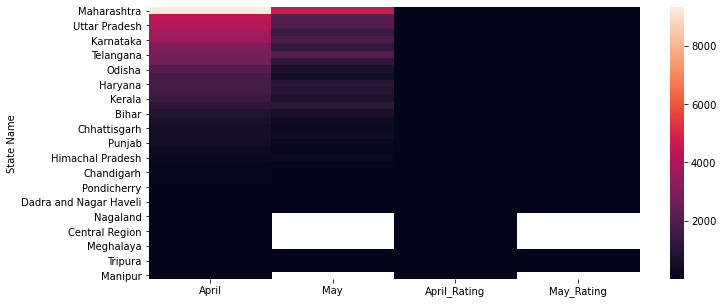

In [73]:
sns.heatmap(State_Name)

Вывод: По количеству оценок выделяются 14 регионов, оценок в апреле более 1000. В мае произошло снижение количества оценок по всем регионам.